# FLIGHT FARE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
dataset=pd.read_excel('Data_Flight_Fare.xlsx')
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
dataset.shape

(10683, 11)

In [4]:
dataset.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
#checking for duplicate values
dataset.duplicated().sum()

220

In [7]:
dataset.drop_duplicates(inplace=True)

In [8]:
dataset.duplicated().sum()

0

In [9]:
#checking for missing values
dataset.isnull()
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
dataset.dropna(inplace=True)

In [11]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Feature Engineering

handling object data

In [12]:
#Date_of_Journey, Dep_Time, Arrival_Time, Duration are object datatype.
#To derive numeric features on these, we use pandas to_datetime method to convert object data type to datetime datatype.
dataset['journey_day']=pd.to_datetime(dataset.Date_of_Journey, format="%d/%m/%Y").dt.day
dataset['journey_month']=pd.to_datetime(dataset.Date_of_Journey,format='%d/%m/%Y').dt.month
dataset['journey_year']=pd.to_datetime(dataset.Date_of_Journey,format="%d/%m/%Y").dt.year
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [13]:
dataset['journey_year'].unique().sum()

2019

In [14]:
dataset.drop(columns=['journey_year','Date_of_Journey'],inplace=True)

In [15]:
dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
#converting dep_time into hour and min,then drop Dep_Time
dataset['dep_hour']=pd.to_datetime(dataset.Dep_Time).dt.hour
dataset['dep_min']=pd.to_datetime(dataset.Dep_Time).dt.minute
dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [17]:
dataset.drop(columns=['Dep_Time'],inplace=True)

In [18]:
#converting Arrival_Time into hour and min,then drop Arrival_Time
dataset['arrival_hour']=pd.to_datetime(dataset.Arrival_Time).dt.hour
dataset['arrival_min']=pd.to_datetime(dataset.Arrival_Time).dt.minute
#dataset.head()

In [19]:
dataset.drop(['Arrival_Time'],axis=1,inplace=True)

In [20]:
#duration
dataset['Total_duration']=dataset['Duration'].str.replace("h", '*1').str.replace(' ', '+').str.replace('m', '/60').apply(eval)
dataset.drop(['Duration'],axis=1,inplace=True)

In [21]:
dataset[['Source','Destination','Route','Total_Stops']]

,Source,Destination,Route,Total_Stops
0,Banglore,New Delhi,BLR → DEL,non-stop
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops
3,Kolkata,Banglore,CCU → NAG → BLR,1 stop
4,Banglore,New Delhi,BLR → NAG → DEL,1 stop
...,...,...,...,...
10678,Kolkata,Banglore,CCU → BLR,non-stop
10679,Kolkata,Banglore,CCU → BLR,non-stop
10680,Banglore,Delhi,BLR → DEL,non-stop
10681,Banglore,New Delhi,BLR → DEL,non-stop


Handling categorical data

In [22]:
# Airline, Source, Destination, Route, Total_Stops, Additional_Info are all categorical.
Airline = dataset[["Airline"]]
Airline = pd.get_dummies(dataset['Airline'],drop_first=False)
Airline.head(2)

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0


In [23]:
dataset.drop(columns=['Route','Additional_Info'],inplace=True)

In [24]:
Source = dataset[["Source"]]
Source = pd.get_dummies(dataset['Source'],drop_first=True)
Source.head(2)

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0


In [25]:
Destination = dataset[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0


In [26]:
dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Total_duration
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2.833333
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7.416667
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19.000000
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5.416667
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4.750000


In [27]:
data_train = pd.concat([dataset, Airline, Source, Destination], axis = 1)
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_train.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Total_duration,Air Asia,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2.833333,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7.416667,0,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19.000000,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5.416667,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4.750000,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
df=pd.DataFrame(data_train)
df.to_excel('dataset.xlsx',index=False)

In [29]:
data_train.shape

(10462, 30)

# Feature Selection

In [30]:
data_train.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Total_duration', 'Air Asia',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [31]:
X = data_train.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Total_duration', 'Air Asia',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
y = data_train.iloc[:, 1]

In [32]:
print(X.shape, y.shape)

(10462, 29) (10462,)


FEATURE IMPORTANCE

In [33]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)

[2.56875737e-01 1.47180968e-01 5.18486067e-02 2.62696565e-02
 2.47803455e-02 3.00743409e-02 2.23486135e-02 9.41903381e-02
 1.81853516e-03 8.41702826e-03 1.76604558e-03 1.39654307e-02
 1.44299267e-01 6.81890344e-02 2.07776758e-02 8.43660402e-04
 2.51491323e-03 1.28654532e-04 4.79132868e-03 6.03982468e-05
 4.65730359e-04 1.11805865e-02 3.07239682e-03 7.51219817e-03
 9.12932559e-03 1.45786112e-02 6.82646885e-03 4.84748380e-04
 2.56093565e-02]


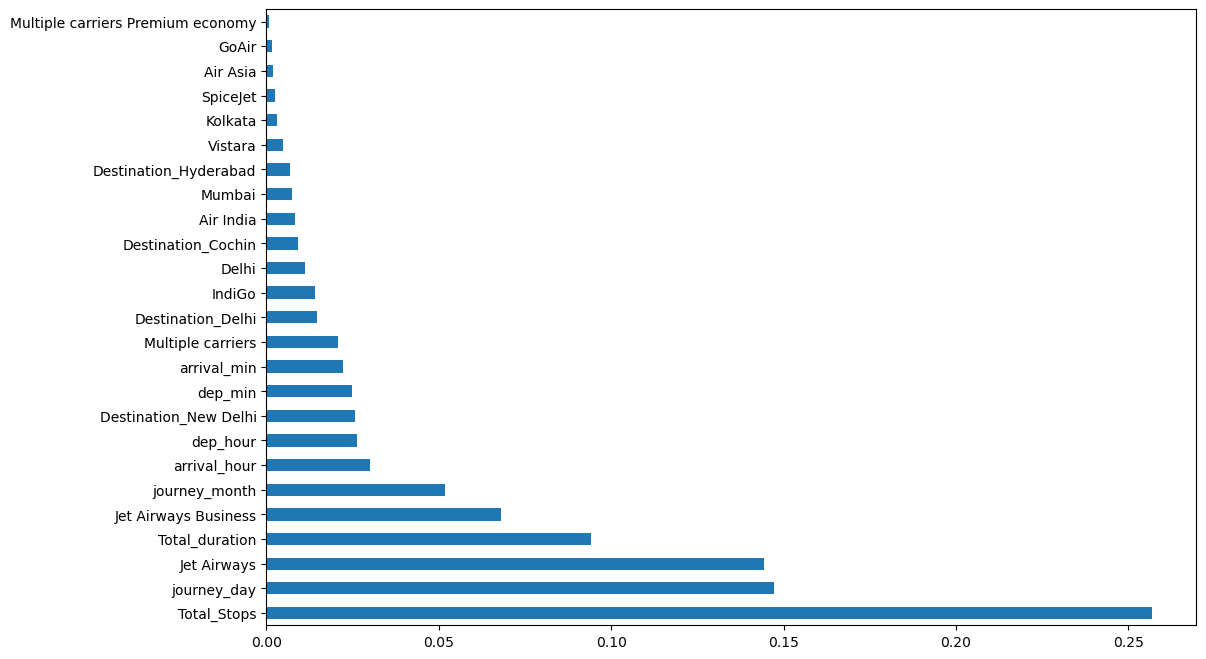

In [34]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [35]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [36]:
calc_vif(X)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Total_Stops,3.157121
1,journey_day,1.026696
2,journey_month,1.313571
3,dep_hour,1.064655
4,dep_min,1.104458
5,arrival_hour,1.070860
6,arrival_min,1.132632
7,Total_duration,2.499644
8,Air Asia,inf
9,Air India,inf


# Fit model-Random Forest

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
y_test

2150     17996
3784      3873
714       4462
7558      2228
7413      4991
         ...  
653      12898
8607     12898
10261    11627
10581     6795
5285     13377
Name: Price, Length: 2093, dtype: int64

In [40]:
print('Model Performance on Training Set:', round(rf_reg.score(X_train, y_train)*100,2))
print('Model Performance on Test Set:', round(rf_reg.score(X_test, y_test)*100,2))

Model Performance on Training Set: 95.35
Model Performance on Test Set: 81.45


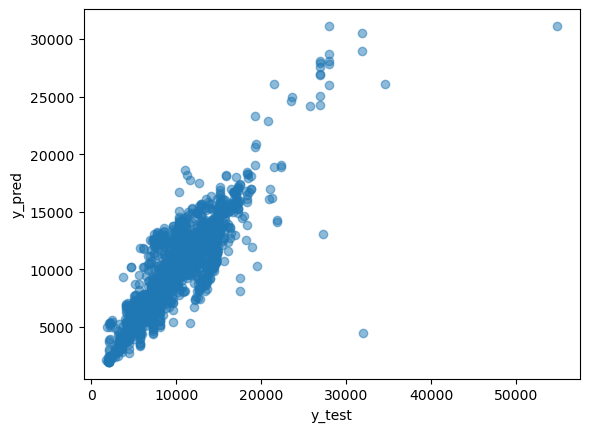

In [41]:
# Plot performance graph
y_pred = rf_reg.predict(X_test)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [42]:
# Model Error Values
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#RMSE = sqrt((PV-OV)^2/n)

MAE: 1167.71903551159
MSE: 3867113.5275768004
RMSE: 1966.497782245584


In [43]:
# RMSE/(max(DV)-min(DV))
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

Normalized RMSE  0.04
Max Value:  79512 
Min Value:  1759


In [44]:
rf_reg.score(X,y)

0.9264367324888885

SAVE THE MODEL

In [ ]:
import pickle
# open a file, where you want to store the data
file = open('flight_fare.pkl', 'wb')
# dump information to that file
pickle.dump(rf_reg, file)